# Most Valuable Player: The LeBron James Definition


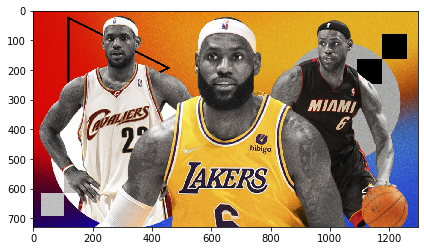

In [254]:
from skimage import io
 
img = io.imread("lebron-james.jpg")
io.imshow(img)

## Introduction
LeBron James has shifted the course of the NBA not only because of his longevity in the league, but also for consistently being a high performer on a nightly basis. Any LeBron James fan will emphatically talk about how valuable he has been on the teams he has played for. Many will claim that his teams often rely highly on his performance to win a game. As an avid LeBron James fan myself, I truly believe that he has a significant impact on his teams whenever he is on the floor, and that his nightly performance will determine whether his team succeeds or fails. How true is this?

This project will focus on determining how important LeBron's performance is for his team's success. It will use data found in https://www.basketball-reference.com/players/j/jamesle01.html, which will be used to train and test a random forest classifier. This model will use LeBron's statistics per game since he entered the league up until season 20 to predict whether the team won or lost. Ultimately, the goal is to determine whether his team's success can be accurately predicted by solely using LeBron James' nightly performance. 

## Introduction to the Dataset 

The following dataset has 5 rows and 38 columns. A brief explanation of the most important columns is provided below:
- __Tm__: LeBron's team on the date in which the game was played. It is important to note that he has been on three teams: Cleveland Cavaliers, Miami Heat, and Los Angeles Lakers.
- __X__: Whether the game was home or away. Away games are denoted by '@'.
- __Opp__: LeBron's opposing team on the date in which the game was played. 
- __X.1__: Whether LeBron's team won or lost, as well as the resulting point differential (i.e., +21 means that LeBron's team won by 21 points).
- __MP__: Total minutes played by LeBron on the specified game.
- __FG, X3P, FT__: The 'FG' column represents how many baskets worth 2 points were scored by LeBron. Similarly, the 'X3P' and 'FT' columns show the total three pointers and free throws made by LeBron, respectively. 
- __FGA, X3PA, FTA__: These columns show how many total attempts were made by shot type on a specified game. For instance, a value of 4 in the 'X3PA' column means that LeBron took 4 three point shots during the given game. 
- __FG., X3P., FT.__: These columns provides an accuracy metric, showing the percentage of field goals, three pointers, and free throws made by LeBron during a given game, respectively. 
- __ORB, DRB__: Total offensive and defensive rebounds taken by LeBron James during a given game, respectively.
- __AST, STL, BLK, TOV__: Total assists, steals, blocks, and turnovers made by LeBron James during a given game, respectively.
- __PTS__: Total points scored by LeBron James during a given game. 
- __GmSc__: This column shows the player's 'Game Score'. It is a measure of the player's productivity in a game. Missing shots and commiting turnovers will hurt a player's game score. 
- __PM__: This column referes to a player's plus/minus. It shows how the team performed when LeBron was in the game. For instance, if LeBron has a plus/minus of -10, it means that his team was outscored by 10 points while he was on the game. 

A glimpse of the first 5 rows of the dataset is provided below: 

In [255]:
import pandas as pd

df = pd.read_csv("lebron-james-data.csv")
df.head()

,Rk,G,Month,Day,Year,Age.Year,Age.Day,Tm,X,Opp,...,TOV,PF,PTS,GmSc,PM,Season,Date,Status,Name,LName
0,1,1.0,10,29,2003,18,303,CLE,@,SAC,...,2.0,3.0,25.0,24.7,-9.0,1,10/29/2003,Regular Season,Lebron,James
1,2,2.0,10,30,2003,18,304,CLE,@,PHO,...,7.0,1.0,21.0,14.7,-3.0,1,10/30/2003,Regular Season,Lebron,James
2,3,3.0,11,1,2003,18,306,CLE,@,POR,...,2.0,3.0,8.0,5.0,-21.0,1,11/1/2003,Regular Season,Lebron,James
3,4,4.0,11,5,2003,18,310,CLE,NaN,DEN,...,2.0,1.0,7.0,11.2,-3.0,1,11/5/2003,Regular Season,Lebron,James
4,5,5.0,11,7,2003,18,312,CLE,@,IND,...,7.0,2.0,23.0,9.0,-7.0,1,11/7/2003,Regular Season,Lebron,James


## Cleaning the Dataset

Before building the random forest classifier, it is important to clean the dataset. This dataset contains columns showing redundant data. For instance, there are three columns specifying the game's date denoted as 'month', 'day', 'year'. These columns can be removed since there is already a column specifying the date in 'mm/dd/yyyy' format under the 'Date' column. The 'Date' column will then be converted into a datetime object. 

In [256]:
df = df.drop(['Month', 'Day', 'Year'], axis=1)
df['Date']= pd.to_datetime(df['Date'])
df.head()

,Rk,G,Age.Year,Age.Day,Tm,X,Opp,X.1,GS,MP,...,TOV,PF,PTS,GmSc,PM,Season,Date,Status,Name,LName
0,1,1.0,18,303,CLE,@,SAC,L (-14),1,42:00:00,...,2.0,3.0,25.0,24.7,-9.0,1,2003-10-29,Regular Season,Lebron,James
1,2,2.0,18,304,CLE,@,PHO,L (-9),1,41:00:00,...,7.0,1.0,21.0,14.7,-3.0,1,2003-10-30,Regular Season,Lebron,James
2,3,3.0,18,306,CLE,@,POR,L (-19),1,39:00:00,...,2.0,3.0,8.0,5.0,-21.0,1,2003-11-01,Regular Season,Lebron,James
3,4,4.0,18,310,CLE,NaN,DEN,L (-4),1,41:00:00,...,2.0,1.0,7.0,11.2,-3.0,1,2003-11-05,Regular Season,Lebron,James
4,5,5.0,18,312,CLE,@,IND,L (-1),1,44:00:00,...,7.0,2.0,23.0,9.0,-7.0,1,2003-11-07,Regular Season,Lebron,James


### Missing Data
It is important to note that the random forest classifier can't be built if the dataset is containing missing values. In this case, values may be missing for the following reasons: 
- __LeBron did not play__: The following code cell shows that there are 56 missing values for many of the key features in the dataset, such as minutes played, field goal attempts, offensive rebounds, among others. This indicates that LeBron did not play on 56 games according to the data, and thus there was no data recorded for the specified game.
- __Nature of the game__: Note that columns 'X3P.' and 'FT.' have more than 56 values missing. This is because there were games in which LeBron did not make any three point or free throw attempts. Therefore, the fraction is set to 'null' since the denominator is 0.

These missing values will be dropped from the dataset. Imputing LeBron's performance for a given game using averages or any other metrics would lead to inaccurate inferences about his performance on a given night and introduce errors. 

In [257]:
df.isnull().sum()

Rk            0
G            56
Age.Year      0
Age.Day       0
Tm            0
X           890
Opp           0
X.1           0
GS            0
MP           56
FG           56
FGA          56
FG.          56
X3P          56
X3PA         56
X3P.        100
FT           56
FTA          56
FT.          74
ORB          56
DRB          56
TRB          56
AST          56
STL          56
BLK          56
TOV          56
PF           56
PTS          56
GmSc         56
PM           57
Season        0
Date          0
Status        0
Name          0
LName         0
dtype: int64

In [258]:
df = df.dropna()

### Modifying Dataset

One of the first things I noticed about this dataset is that teams such as Phoenix and Brooklyn were not addressed by their official abbreviations, which may cause confusion when visualizing results later in the exploratory analysis section. Therefore, these values will be replaced with their official abbreviations found in the following page: https://tinyurl.com/nbaabb

In [259]:
df['Opp'].replace('PHO', 'PHX', inplace=True)
df['Opp'].replace('BRK', 'BKN', inplace=True)

It is also important to note that the random forest classifier requires the minutes played to be converted from 'mm:ss' format to integers, since it will be used as one of the predictors. This will be executed on the following code cell.  

In [260]:
times = df['MP'].to_list()
ls = []
for i in times:
    ls.append(int(i[:2]))

df.drop('MP', axis = 1, inplace = True)

## Put whatever series you want in its place
df['MP'] = ls
df.head()

,Rk,G,Age.Year,Age.Day,Tm,X,Opp,X.1,GS,FG,...,PF,PTS,GmSc,PM,Season,Date,Status,Name,LName,MP
0,1,1.0,18,303,CLE,@,SAC,L (-14),1,12.0,...,3.0,25.0,24.7,-9.0,1,2003-10-29,Regular Season,Lebron,James,42
1,2,2.0,18,304,CLE,@,PHX,L (-9),1,8.0,...,1.0,21.0,14.7,-3.0,1,2003-10-30,Regular Season,Lebron,James,41
2,3,3.0,18,306,CLE,@,POR,L (-19),1,3.0,...,3.0,8.0,5.0,-21.0,1,2003-11-01,Regular Season,Lebron,James,39
4,5,5.0,18,312,CLE,@,IND,L (-1),1,8.0,...,2.0,23.0,9.0,-7.0,1,2003-11-07,Regular Season,Lebron,James,44
7,8,8.0,18,317,CLE,@,MIA,L (-5),1,6.0,...,3.0,18.0,12.8,-4.0,1,2003-11-12,Regular Season,Lebron,James,42


The last step of cleaning the data will consist of introducing the following two new columns: 
- __Final_PD__: The final point differential of a given game. For instance, a point differential of -10 means that LeBron's team lost by 10 points. 
- __Result__: This will be a binary column in which __'0'__ represents a __'loss'__ and __'1'__ represents a __'win'__. It is important to note that this column must be binary for the random forest classifier to work.

In [261]:
point_differential = []
df.rename(columns = {'X.1':'Final_PD'}, inplace = True)

for i in df['Final_PD']:
    new_i = i[3:]
    new_i = new_i.split(')')
    point_differential.append(int(new_i[0]))

win_loss = []
for points in point_differential:
    if points > 0:
        win_loss.append(1)
    else: 
        win_loss.append(0)
        
df['Final_PD'] = point_differential
df['Result'] = win_loss
df.head()

,Rk,G,Age.Year,Age.Day,Tm,X,Opp,Final_PD,GS,FG,...,PTS,GmSc,PM,Season,Date,Status,Name,LName,MP,Result
0,1,1.0,18,303,CLE,@,SAC,-14,1,12.0,...,25.0,24.7,-9.0,1,2003-10-29,Regular Season,Lebron,James,42,0
1,2,2.0,18,304,CLE,@,PHX,-9,1,8.0,...,21.0,14.7,-3.0,1,2003-10-30,Regular Season,Lebron,James,41,0
2,3,3.0,18,306,CLE,@,POR,-19,1,3.0,...,8.0,5.0,-21.0,1,2003-11-01,Regular Season,Lebron,James,39,0
4,5,5.0,18,312,CLE,@,IND,-1,1,8.0,...,23.0,9.0,-7.0,1,2003-11-07,Regular Season,Lebron,James,44,0
7,8,8.0,18,317,CLE,@,MIA,-5,1,6.0,...,18.0,12.8,-4.0,1,2003-11-12,Regular Season,Lebron,James,42,0


## Exploratory Analysis

### LeBron James Win/Loss Record by NBA Team

The first step in the exploratory analysis is to study LeBron's record against different teams in the NBA. From the plot below, it can be seen that LeBron has a winning record against 20 out of 30 teams which are currently in the NBA. Thus, it is evident that his teams have historically been succesful when playing against the majority of teams in the league when LeBron is on the floor.   

Text(0.5, 0, 'Opponent')

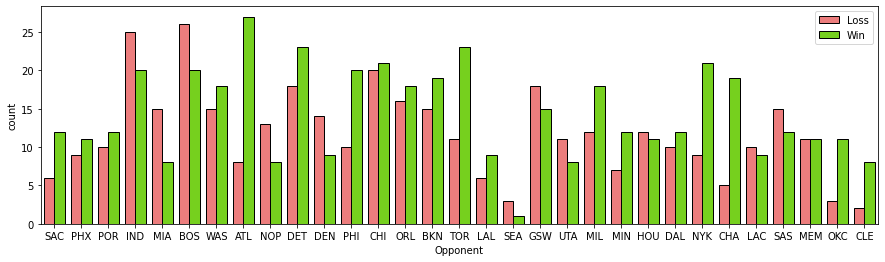

In [262]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
sns.countplot(x = 'Opp', hue = 'Result', data = df, palette = ['#FF6A6A','#76EE00'], edgecolor = "black")
plt.legend(labels=['Loss', 'Win'])
plt.xlabel('Opponent')

### Logistic Regression 
The following exploratory analysis will consist of finding how different key features impact the team's final win/loss result in a game. For instance, one of the most important features any fan will prioritize when it comes to LeBron James is how many points he scored in a game. The following logistic regression curve will show whether there is any relationship between points scored and winning/losing a game. 

<AxesSubplot:xlabel='PTS', ylabel='Result'>

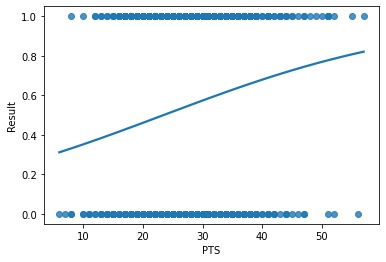

In [263]:
import seaborn as sns 
x = df['PTS']
y = df['Result']

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

The previous logistic regression curve shows that using points scored by LeBron James in a game by itself as a predictor does not yield a good prediction of whether his team will win or lose. Perhaps deeper statistics, such as 'plus/minus' serve as a better predictor. 

<AxesSubplot:xlabel='PM', ylabel='Result'>

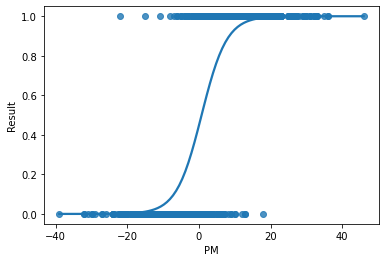

In [264]:
x = df['PM']
y = df['Result']

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

The previous logistic reression curve shows that using LeBron's 'plus/minus' is a great predictor when it comes to determining whether his team will win or lose a game. In general, this plot shows that his team's success is highly dependent on his plus/minus in a game. If LeBron has a negative 'plus/minus', it is very likely that his team will lose the game.

## Random Forest Classifier

Random forests generally provide very good predictions; not only are they good in reducing overfitting, but they also combine a variety of decision trees, which means that predictions will be very close to reality. The first step towards implementing the random forest classifier is to reduce the dataset so that it only contains those features that are believed to be the most important, such as minutes played, field goal percentage, assists, among other features.

In [265]:
new_df = df[['MP', 'FG.', 'X3P.', 'FT.', 'ORB', 'DRB', 'AST', 'STL',  'BLK', 'GmSc','PTS', 'PM', 'Result']]
new_df.head()

,MP,FG.,X3P.,FT.,ORB,DRB,AST,STL,BLK,GmSc,PTS,PM,Result
0,42,0.600,0.0,0.333,2.0,4.0,9.0,4.0,0.0,24.7,25.0,-9.0,0
1,41,0.471,0.2,0.571,2.0,10.0,8.0,1.0,0.0,14.7,21.0,-3.0,0
2,39,0.250,0.0,1.000,0.0,4.0,6.0,2.0,0.0,5.0,8.0,-21.0,0
4,44,0.444,0.5,0.857,0.0,5.0,3.0,0.0,0.0,9.0,23.0,-7.0,0
7,42,0.400,0.4,0.667,1.0,2.0,7.0,2.0,1.0,12.8,18.0,-4.0,0


The following code cell will begin partitoning the data into training and test sets for both the predictors and the response. In this case, 80% of the data will be used for training while 20% will be used for testing. 

In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X = new_df.drop('Result', axis=1)
y = new_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The following code cell will fit the training data for both the predictor and the response variable using the random forest classifier and determine the model's accuracy against the test data. 

In [267]:
#Fit to random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.901840490797546


### Confusion Matrix 
From the previous cell, it is more than likely that the random classifier's accuracy will be around 86.8% when predicting the result of games solely based on LeBron's statistics. A confusion matrix will be built below to visualize its accuracy.

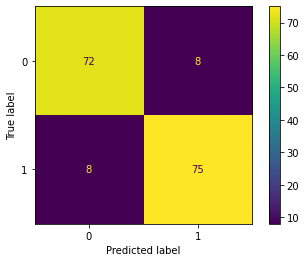

In [268]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

It is evident that the model does a very nice job predicting the result of a game solely based on LeBron's statistics. This goes to show how much his team's success relies on his nightly performance!

### Feature Importance
The following section will determine which features have the most importance when predicting the team's result.

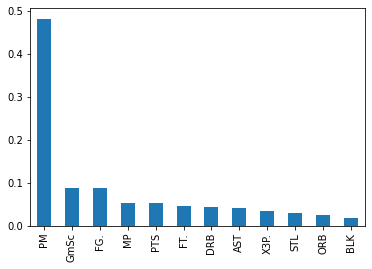

In [269]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();

As suspected in the data exploration section, the most important features used in the random classification model are plus/minus, followed by game score. Hence, it can be said that this model will likely predict that LeBron's team will lose if he has a negative plus/minus, and win otherwise. 

## Conclusion

As a LeBron James fan, I am not overly surprised with the results. Throughout the project, it has been evident that LeBron is the epitome of what being the 'most valuable player' truly is. Predicting a game's outcome by solely using LeBron James statistics with such high accuracies proves just how important LeBron is on any team he plays in, and how much of an impact he has on the game any time he is on the floor! Lastly, some suggestions for further research would be to determine whether any other players have such an impact in determining his/her team's success. This can possibly be done with other players in the 'GOAT' debate, such as Michael Jordan and Kobe Bryant, or players whose longevity has been similar to LeBron's.

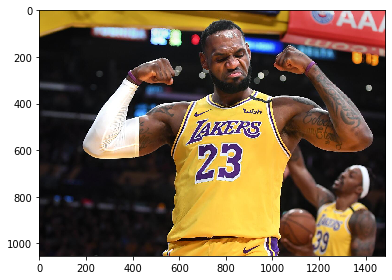

In [270]:
from skimage import io
 
img = io.imread("lebron-james-2.jpeg")
io.imshow(img)